# Dashboard
>Dashboard on Reviewia data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install jupyter_dashboards
!jupyter dashboards quick-setup --sys-prefix

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 2.9 MB 5.6 MB/s 
  Created wheel for jupyter-dashboards: filename=jupyter_dashboards-0.7.0-py3-none-any.whl size=3643484 sha256=0e9d8a894527c9b45b0e1476eaa407bf66c09424fe1c41b8ab366302bbabe75a
  Stored in directory: /root/.cache/pip/wheels/04/4c/8d/1dc835ae389a460f552f11fb92240d2043577e21d022ae0d9d
Successfully built jupyter-dashboards
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Installing /opt/conda/lib/python3.7/site-packages/jupyter_dashboards/nbextension -> jupyter_dashboards
Making directory: /opt/conda/share/jupyter/nbextensions/jupyter_dashboards/
Making directory: /opt/conda/share/jupyter/nbextensions/jupyter_dashboards/notebook
Copying: /opt/conda/lib/python3.7/site-packages/jupyter_dashboards/nbextension/notebook/main.js -> /opt/conda/share/jupyter/nbextensions/jupyter_dashboards/notebook/main.js
Copying: /opt/conda/lib/python3.7/site-packages/jupyter_dashboards/nbextension/note

In [2]:
df=pd.read_csv('/kaggle/input/dashboarddata/Review Data Dump.csv')
df.head()

,index,Company Name,Overall Star Rating,Did you receive a Job Description,Role Interviewed for,Location,Total Time Taken,Number of interview rounds,Racial Discrimination,Uncomfortable Questions asked,...,Percentage Hike Offered,Source of the opportunity,Experience with HR,Experience with Hiring Manager,Would you recommend the company to others,Comments,Posted,Approved,Interview Date,Sufficiently respected
0,1,Communication & Power Industries,5,yes,Medical Product Specialist,New Delhi,0-5 days,2,no,no,...,40+,Career Page,5,5,yes,NaN,9-Feb-20,approved,2010-01,yes
1,2,KPMG,4,no,Director,Mumbai,30-60 days,4,no,no,...,NaN,Employee Referal,5,4,yes,"Very professional, right from scheduling inter...",9-Feb-20,approved,2019-10,yes
2,3,Neocepts Pvt Ltd,5,yes,Software Engineer,Noida,5-15 days,2,no,no,...,10-20,through company HR,5,5,yes,NaN,9-Feb-20,approved,Dec-19,yes
3,4,Accenture,3,yes,Level 6,Banglore,15-30 days,3,no,no,...,NaN,Employee Referal,3,5,yes,"Started entire process couple of months back, ...",9-Feb-20,approved,2018-12,yes
4,5,HR BOT,4,no,Founding Member,Gurgaon,30-60 days,3,no,no,...,30-40,through company HR,4,5,yes,Great interview experience. Company is well fu...,5-Feb-20,approved,2018-07,yes


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ipywidgets import interact
sns.set()

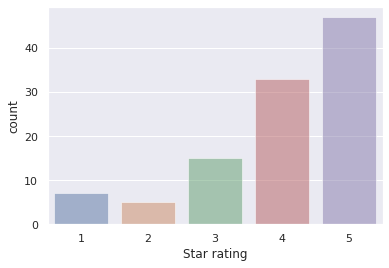

In [4]:
@interact (outcome=df['Final Outcome'].unique())
def plot(outcome):
    ax=sns.countplot(df[df['Final Outcome']==outcome]['Overall Star Rating'].values,alpha=0.5)
    ax.set(xlabel='Star rating')

**Important Point 1: As expected selection or a positive outcome does lead to higher rating**

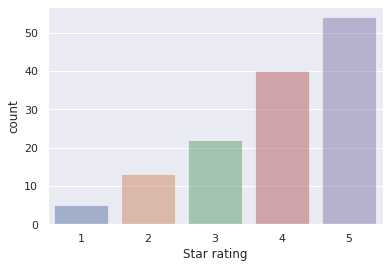

In [5]:
@interact (jd=df['Did you receive a Job Description'].unique())
def plot(jd):
    ax=sns.countplot(df[df['Did you receive a Job Description']==jd]['Overall Star Rating'].values,alpha=0.5)
    ax.set(xlabel='Star rating')

**Important Point 2: It is important for employers to share a good job description**

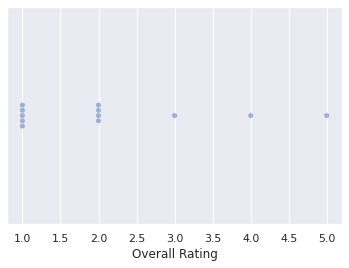

In [6]:
@interact (exp_with_hr=[1,2,3,4,5])
def plot(exp_with_hr):
    ax=sns.swarmplot(df[df['Experience with HR']==exp_with_hr]['Overall Star Rating'].values,hue=df['Overall Star Rating'],alpha=0.5)
    _=ax.set(xlabel='Overall Rating')

**Important Point 3: A positive experience with HR results in a good overall rating**